In [4]:
#!/usr/bin/python
import sys
import math
import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading convenient environment
# %pylab
%matplotlib inline

plt.rcParams['figure.figsize']=[20.,10.]

## DeaLAMMPS Local Stress vs Strain Curve

In [15]:
# Denomination of data folder
# iloc='../muc_3pbt_medium/'
# iloc='/home/maxime/muc_work/local_projects/DeaLAMMPS/build_sm3pbt/'

# iloc='/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/'
# iloc='/home/maxime/local_projects/DeaLAMMPS/build_uniax/'
# floc='nanoscale_state/out/spec/meta.2.dat'
# floc='meta.0.dat'

biloc='/home/maxime'
# biloc='/Users/vassaux/picasso_home'
eiloc='/muc_scratch/local_projects/DeaLAMMPS/'
# eiloc='/local_projects/DeaLAMMPS/'
tiloc='build_dynamic/'
filoc='nanoscale_state/out/spec/'

iloc=biloc+eiloc+tiloc+filoc

# iloc='/home/maxime/muc_work/local_projects/DeaLAMMPS/build_uniax/unconstrained/'
# floc='nano_spec/meta.0.dat'
# floc='nanoscale_state/out/spec/meta.0.dat'
# floc='nanoscale_state/out/spec/meta.2281.dat' # bottom face (2336, 2281)
# floc='nano_spec/meta.18175.dat' # top face
floc='meta.'

In [16]:
latmp=os.listdir(iloc)
latmp

['1757.1066.PE_4.bin',
 '1400.946.PE_1.bin',
 '280.1018.PE_2.bin',
 '771.970.PE_1.bin',
 '422.802.PE_4.bin',
 '924.1090.PE_3.bin',
 '1718.802.PE_2.bin',
 '1500.802.PE_5.bin',
 '1746.1162.PE_5.bin',
 '1875.826.PE_1.bin',
 '1077.1066.PE_3.bin',
 '732.1066.PE_2.bin',
 '1882.889.PE_5.bin',
 '637.658.PE_4.bin',
 '1448.970.PE_1.bin',
 '1603.994.PE_2.bin',
 '501.1210.PE_1.bin',
 '730.730.PE_3.bin',
 '125.1162.PE_1.bin',
 '1068.907.PE_1.bin',
 '1226.899.PE_5.bin',
 '1048.899.PE_2.bin',
 '906.1210.PE_5.bin',
 '771.1210.PE_5.bin',
 '276.802.PE_3.bin',
 '659.730.PE_2.bin',
 '928.610.PE_2.bin',
 '945.946.PE_5.bin',
 '605.892.PE_5.bin',
 '1958.850.PE_4.bin',
 '377.1090.PE_5.bin',
 '889.1114.PE_4.bin',
 '1449.922.PE_2.bin',
 '1793.706.PE_1.bin',
 '236.1114.PE_3.bin',
 '637.706.PE_4.bin',
 '1188.826.PE_4.bin',
 '1936.658.PE_1.bin',
 '1670.1066.PE_2.bin',
 '1466.1090.PE_5.bin',
 '229.922.PE_4.bin',
 '581.778.PE_5.bin',
 '1154.1138.PE_1.bin',
 '693.897.PE_1.bin',
 '1497.658.PE_4.bin',
 '1324.658.PE_5.b

In [18]:
lattmpt=[]
for thing in latmp:
    if ("meta" in thing):
        if ("" in thing):
            lattmpt.append(thing)
        
# lattmpt.append("")
lattmpt.sort()
lattmpt

['meta.1018.dat',
 'meta.1042.dat',
 'meta.1066.dat',
 'meta.1090.dat',
 'meta.1114.dat',
 'meta.1138.dat',
 'meta.1162.dat',
 'meta.1186.dat',
 'meta.1210.dat',
 'meta.610.dat',
 'meta.634.dat',
 'meta.658.dat',
 'meta.682.dat',
 'meta.706.dat',
 'meta.730.dat',
 'meta.754.dat',
 'meta.778.dat',
 'meta.802.dat',
 'meta.826.dat',
 'meta.850.dat',
 'meta.874.dat',
 'meta.889.dat',
 'meta.892.dat',
 'meta.895.dat',
 'meta.897.dat',
 'meta.898.dat',
 'meta.899.dat',
 'meta.901.dat',
 'meta.904.dat',
 'meta.907.dat',
 'meta.910.dat',
 'meta.922.dat',
 'meta.946.dat',
 'meta.970.dat',
 'meta.994.dat']

In [19]:
dtf=pd.DataFrame()
fpdisp = 0.0
for thing in lattmpt:
    tloc=iloc+thing
    print(tloc)
    if(os.path.isfile(tloc)):
        print(tloc)
        df=pd.read_csv(tloc)
        namcol=df.columns
        print(namcol)
        df.reset_index(inplace=True)
        df.insert(1, 'config', thing)
        #df=pd.read_csv(tloc, names=None)
        #df['imposed_displacement'] += fpdisp
        #fpdisp=df['imposed_displacement'][-1:].values
        #     df['imposed_displacement'] *= -1.0
        dtf=dtf.append(df)
        #print(df)

/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dynamic/nanoscale_state/out/spec/meta.1018.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dynamic/nanoscale_state/out/spec/meta.1018.dat
Index(['timest_no', 'cell', 'loc_x', 'loc_y', 'loc_z', 'strain_xx',
       'strain_yy', 'strain_zz', 'strain_xy', 'strain_xz', 'strain_yz',
       'stress_xx', 'stress_yy', 'stress_zz', 'stress_xy', 'stress_xz',
       'stress_yz', 'stif_xxxx', 'stif_yyyy', 'stif_zzzz'],
      dtype='object')
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dynamic/nanoscale_state/out/spec/meta.1042.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dynamic/nanoscale_state/out/spec/meta.1042.dat
Index(['timest_no', 'cell', 'loc_x', 'loc_y', 'loc_z', 'strain_xx',
       'strain_yy', 'strain_zz', 'strain_xy', 'strain_xz', 'strain_yz',
       'stress_xx', 'stress_yy', 'stress_zz', 'stress_xy', 'stress_xz',
       'stress_yz', 'stif_xxxx', 'stif_yyyy', 'stif_zzzz'],
      dtype='object')


Index(['timest_no', 'cell', 'loc_x', 'loc_y', 'loc_z', 'strain_xx',
       'strain_yy', 'strain_zz', 'strain_xy', 'strain_xz', 'strain_yz',
       'stress_xx', 'stress_yy', 'stress_zz', 'stress_xy', 'stress_xz',
       'stress_yz', 'stif_xxxx', 'stif_yyyy', 'stif_zzzz'],
      dtype='object')
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dynamic/nanoscale_state/out/spec/meta.826.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dynamic/nanoscale_state/out/spec/meta.826.dat
Index(['timest_no', 'cell', 'loc_x', 'loc_y', 'loc_z', 'strain_xx',
       'strain_yy', 'strain_zz', 'strain_xy', 'strain_xz', 'strain_yz',
       'stress_xx', 'stress_yy', 'stress_zz', 'stress_xy', 'stress_xz',
       'stress_yz', 'stif_xxxx', 'stif_yyyy', 'stif_zzzz'],
      dtype='object')
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dynamic/nanoscale_state/out/spec/meta.850.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dynamic/nanoscale_state/out/spec/meta.850.dat
Inde

In [20]:
dtf

,index,config,timest_no,cell,loc_x,loc_y,loc_z,strain_xx,strain_yy,strain_zz,...,strain_yz,stress_xx,stress_yy,stress_zz,stress_xy,stress_xz,stress_yz,stif_xxxx,stif_yyyy,stif_zzzz
0,0,meta.1018.dat,1,1018,0.000812,-0.010977,0.000005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,4.789970e+09,4.696100e+09,4.397220e+09
1,1,meta.1018.dat,2,1018,0.000812,-0.010977,0.000005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,4.789970e+09,4.696100e+09,4.397220e+09
2,2,meta.1018.dat,3,1018,0.000812,-0.010977,0.000005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,4.789970e+09,4.696100e+09,4.397220e+09
3,3,meta.1018.dat,4,1018,0.000812,-0.010977,0.000005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,4.789970e+09,4.696100e+09,4.397220e+09
4,4,meta.1018.dat,5,1018,0.000812,-0.010977,0.000005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,4.789970e+09,4.696100e+09,4.397220e+09
5,5,meta.1018.dat,6,1018,0.000812,-0.010977,0.000005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,4.789970e+09,4.696100e+09,4.397220e+09
6,6,meta.1018.dat,7,1018,0.000812,-0.010977,0.000005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,4.789970e+09,4.696100e+09,4.397220e+09
7,7,meta.1018.dat,8,1018,0.000812,-0.010977,0.000005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,4.789970e+09,4.696100e+09,4.397220e+09
8,8,meta.1018.dat,9,1018,0.000812,-0.010977,0.000005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,4.789970e+09,4.696100e+09,4.397220e+09
9,9,meta.1018.dat,10,1018,0.000812,-0.010977,0.000005,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,4.789970e+09,4.696100e+09,4.397220e+09


meta.892.dat
0.00122017


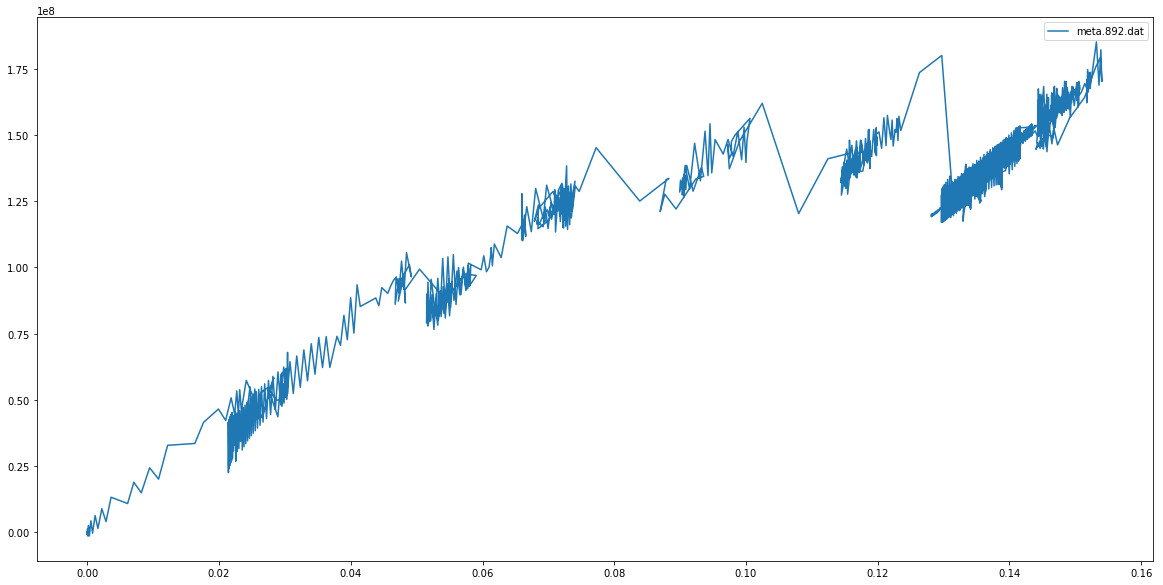

In [30]:
for thingy in lattmpt:
    if(thingy=='meta.892.dat'):
#     if(dtf[dtf['config']==thingy]['loc_y'][0]<-0.001):
#     if(dtf[dtf['config']=='meta.994.dat']):
        print (thingy)
        print (dtf[dtf['config']==thingy]['loc_y'][0])
        plt.plot(dtf[dtf['config']==thingy]['strain_yy'], 
                 dtf[dtf['config']==thingy]['stress_yy'], label=thingy)
plt.legend()
plt.show()

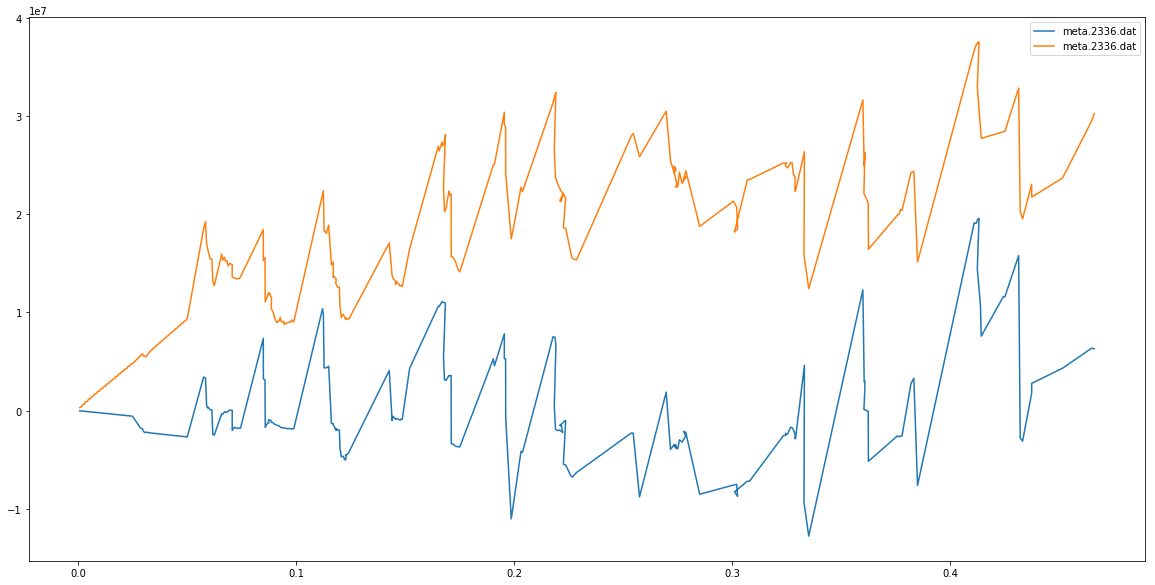

In [91]:
thingy="meta.2336.dat"
plt.plot(dtf[dtf['config']==thingy]['strain_xx'], 
         dtf[dtf['config']==thingy]['stress_yy'], label=thingy)
plt.plot(dtf[dtf['config']==thingy]['strain_xx'], 
         dtf[dtf['config']==thingy]['stress_zz'], label=thingy)
plt.legend()
plt.show()

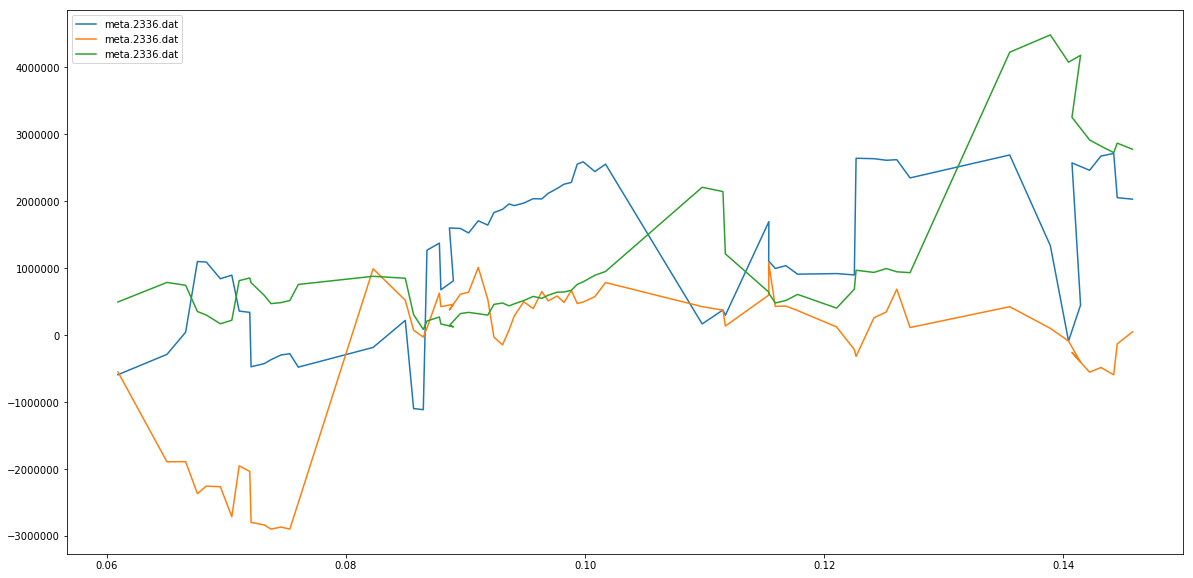

In [42]:
thingy="meta.2336.dat"
plt.plot(dtf[dtf['config']==thingy]['strain_xx'], 
         dtf[dtf['config']==thingy]['stress_xy'], label=thingy)
plt.plot(dtf[dtf['config']==thingy]['strain_xx'], 
         dtf[dtf['config']==thingy]['stress_xz'], label=thingy)
plt.plot(dtf[dtf['config']==thingy]['strain_xx'], 
         dtf[dtf['config']==thingy]['stress_yz'], label=thingy)
plt.legend()
plt.show()

## 3PBT Macroscopic Load vs Deflection Curve

In [5]:
# Denomination of data folder

biloc='/home/maxime'
# biloc='/Users/vassaux/picasso_home'
eiloc='/muc_scratch/local_projects/DeaLAMMPS/'
# eiloc='/local_projects/DeaLAMMPS/'
tiloc=''
filoc=''

iloc=biloc+eiloc+tiloc+filoc

floc='macroscale_log/load_deflection.csv'

In [6]:
latmp=os.listdir(iloc)
latmp

['build_dogbone',
 'build_shear',
 'box',
 'LICENSE',
 'READMEs',
 'build_3pbt',
 'CMakeLists.txt',
 'CMakeLists',
 'build_dogbone_w0.013',
 'build_uniax',
 'build_uniax3',
 'build_3pbt2',
 'build_dynamic',
 'build_uniax4',
 'README.md',
 '.gitignore',
 'build_3pbt3',
 '.git',
 'build_uniax2',
 'dealammps.cc',
 'build_3pbt5',
 'build_dynamic_el',
 'build_3pbt4',
 'saved_input_boxes']

In [7]:
lattmpt=[]
for thing in latmp:
    if (#"3pbt6" in thing or "3pbt3" in thing or "3pbt2" in thing
        thing.endswith("_dogbone_w0.013")
        or "dynamic" in thing
       ):
        lattmpt.append(thing)
        
# lattmpt.append("")
lattmpt.sort()
lattmpt

['build_dogbone_w0.013', 'build_dynamic', 'build_dynamic_el']

In [8]:
dtf=pd.DataFrame()
# fpdisp = 0.0
for thing in lattmpt:
    tloc=iloc+thing+"/"+floc
    print(tloc)
    df=pd.read_csv(tloc)
    df.insert(1, 'config', thing)
#     df['gauge_length'] += fpdisp
#     fpdisp=df['gauge_length'][-1:].values
#     df['imposed_displacement'] *= -1.0
    dtf=dtf.append(df)

/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dogbone_w0.013/macroscale_log/load_deflection.csv
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dynamic/macroscale_log/load_deflection.csv
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_dynamic_el/macroscale_log/load_deflection.csv


In [9]:
dtf

,timestep,config,time,gauge_length,applied_force
0,0,build_dogbone_w0.013,0.000000,0.051228,0.000000
1,1,build_dogbone_w0.013,1.000000,0.051393,313.116272
2,2,build_dogbone_w0.013,2.000000,0.051558,626.232548
3,3,build_dogbone_w0.013,3.000000,0.051723,939.348809
4,4,build_dogbone_w0.013,4.000000,0.051888,1252.465074
5,5,build_dogbone_w0.013,5.000000,0.052053,1565.581347
6,6,build_dogbone_w0.013,6.000000,0.052218,1878.697623
7,7,build_dogbone_w0.013,7.000000,0.052383,2191.813895
8,8,build_dogbone_w0.013,8.000000,0.052690,2292.292609
9,9,build_dogbone_w0.013,9.000000,0.052835,2570.299283


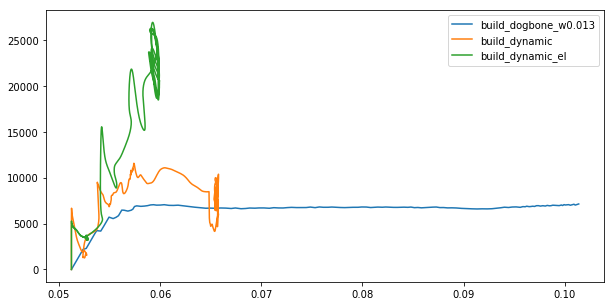

In [13]:
plt.rcParams['figure.figsize']=[10.,5.]
thingy="build_dogbone_w0.013"
plt.plot(dtf[dtf['config']==thingy]['gauge_length'], 
         dtf[dtf['config']==thingy]['applied_force'], label=thingy)
thingy="build_dynamic"
plt.plot(dtf[dtf['config']==thingy]['gauge_length'], 
         dtf[dtf['config']==thingy]['applied_force'], label=thingy)
thingy="build_dynamic_el"
plt.plot(dtf[dtf['config']==thingy]['gauge_length'], 
         dtf[dtf['config']==thingy]['applied_force'], label=thingy)
plt.legend()
plt.show()

In [139]:
## Gauge strain for dogbone
stdf=pd.DataFrame()
tstdf=pd.read_csv(biloc+'/tmp/dogbone/data_tp.csv')
tstdf.insert(1, 'location', 'top')
bstdf=pd.read_csv(biloc+'/tmp/dogbone/data_bp.csv')
bstdf.insert(1, 'location', 'bottom')
bstdf['displacement:1'] *= -1.0
stdf=stdf.append(tstdf[['displacement:1','Time']])
stdf=stdf.append(bstdf[['displacement:1','Time']])
dstdf=stdf.groupby('Time').sum()
dstdf['distance']=dstdf['displacement:1']+0.061376934999999994
dstdf['eyy']=dstdf['displacement:1']/0.061376934999999994 
dstdf.reset_index(inplace=True)
forc=[]
for ti in dstdf['Time']:
    forc.append(dtf[dtf['time']==ti]['applied_force'].iloc[0])
dstdf['force']=forc
dstdf['pyy']=dstdf['force']/(0.005*0.006)
dstdf

,Time,displacement:1,distance,eyy,force,pyy
0,5,0.001262,0.062639,0.020569,927.073588,3.090245e+07
1,10,0.002576,0.063953,0.041969,1713.378300,5.711261e+07
2,15,0.004062,0.065439,0.066181,2326.946193,7.756487e+07
3,20,0.005707,0.067084,0.092980,2777.616022,9.258720e+07
4,25,0.007422,0.068799,0.120928,3098.400419,1.032800e+08
5,30,0.009477,0.070854,0.154402,3232.532911,1.077511e+08
6,35,0.011980,0.073357,0.195181,3172.471743,1.057491e+08
7,40,0.014647,0.076024,0.238642,3022.884797,1.007628e+08
8,45,0.017124,0.078501,0.279002,3057.631920,1.019211e+08
9,50,0.019594,0.080971,0.319245,3085.548360,1.028516e+08


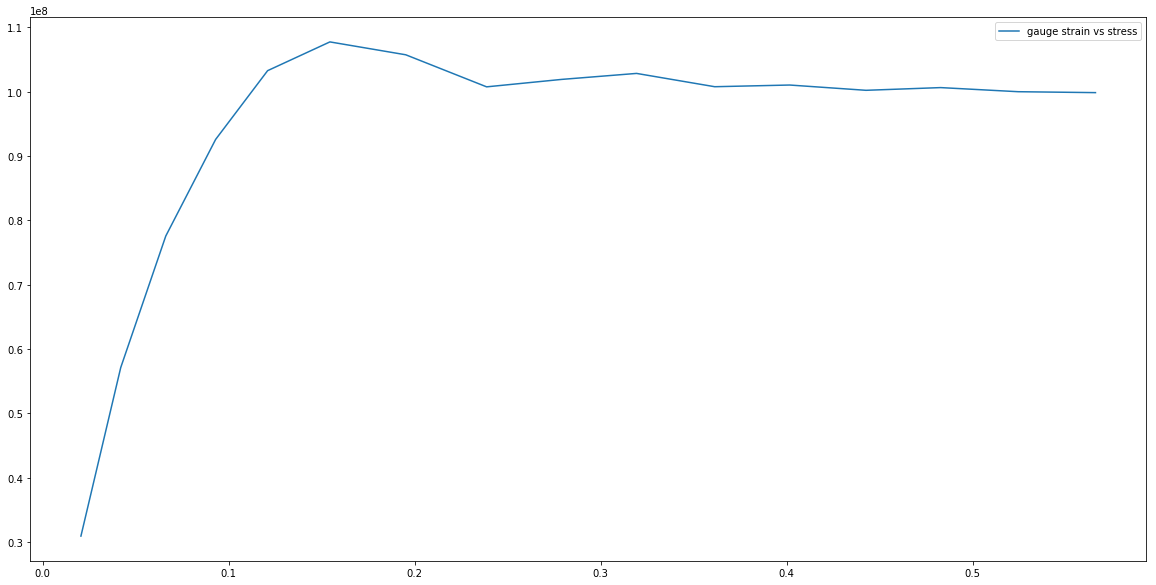

In [141]:
plt.plot(dstdf['eyy'], 
         dstdf['pyy'], label='gauge strain vs stress')
plt.legend()
plt.show()

## LAMMPS Uniaxial

In [5]:
# Denomination of data folder

biloc='/home/maxime'
# biloc='/Users/vassaux/picasso_home'
eiloc='/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/'

iloc=biloc+eiloc

floc='PE_straining.dat'

In [6]:
latmp=os.listdir(iloc)
latmp

['test_repl3_tempt200_nsst1000',
 'test_repl2_tempt300_nsst10000',
 'test_repl1_tempt300_nsst100000',
 'test_repl3_tempt200_nsst10000',
 'test_repl1_tempt300_nsst10000',
 'test_repl4_tempt200_nsst1000000',
 'test_repl4_tempt200_nsst10000',
 'test_repl5_tempt300_nsst10000',
 'test_repl4_tempt300_nsst1000000',
 'test_repl5_tempt300_nsst100000',
 'test_repl5_tempt200_nsst100000',
 'test_repl3_tempt300_nsst10000',
 'test_repl1_tempt200_nsst10000000',
 'test_repl3_tempt300_nsst1000000',
 'test_repl4_tempt300_nsst100000',
 'test_repl5_tempt200_nsst10000',
 'test_repl1_tempt300_nsst1000000',
 'test_repl2_tempt300_nsst1000000',
 'test_repl2_tempt200_nsst1000000',
 'test_repl4_tempt200_nsst1000',
 'test_repl1_tempt200_nsst10000',
 'test_repl1_tempt200_nsst1000000',
 'test_repl1_tempt200_nsst1000',
 'test_repl5_tempt200_nsst1000000',
 'test_repl1_tempt300_nsst1000',
 'test_repl4_tempt300_nsst1000',
 'test_repl2_tempt300_nsst1000',
 'test_repl4_tempt300_nsst10000',
 'test_repl3_tempt300_nsst10000

In [13]:
lattmpt=[]
for thing in latmp:
    #if ("side" in thing):
        lattmpt.append(thing)
        
# lattmpt.append("")
lattmpt.sort()
lattmpt

['test_repl1_tempt200_nsst1000',
 'test_repl1_tempt200_nsst10000',
 'test_repl1_tempt200_nsst100000',
 'test_repl1_tempt200_nsst1000000',
 'test_repl1_tempt200_nsst10000000',
 'test_repl1_tempt300_nsst1000',
 'test_repl1_tempt300_nsst10000',
 'test_repl1_tempt300_nsst100000',
 'test_repl1_tempt300_nsst1000000',
 'test_repl1_tempt300_nsst10000000',
 'test_repl2_tempt200_nsst1000',
 'test_repl2_tempt200_nsst10000',
 'test_repl2_tempt200_nsst100000',
 'test_repl2_tempt200_nsst1000000',
 'test_repl2_tempt300_nsst1000',
 'test_repl2_tempt300_nsst10000',
 'test_repl2_tempt300_nsst100000',
 'test_repl2_tempt300_nsst1000000',
 'test_repl3_tempt200_nsst1000',
 'test_repl3_tempt200_nsst10000',
 'test_repl3_tempt200_nsst100000',
 'test_repl3_tempt200_nsst1000000',
 'test_repl3_tempt300_nsst1000',
 'test_repl3_tempt300_nsst10000',
 'test_repl3_tempt300_nsst100000',
 'test_repl3_tempt300_nsst1000000',
 'test_repl4_tempt200_nsst1000',
 'test_repl4_tempt200_nsst10000',
 'test_repl4_tempt200_nsst10000

In [14]:
dtf=pd.DataFrame()
nsavg=750
for thing in lattmpt:
    tloc=iloc+thing+"/"+floc
    print(tloc)
    if(os.path.isfile(tloc)):
        print(tloc)
        replica=int(thing[9])
        temp=float(thing[16:19])
        nsstrain=int(thing[24:])
        print(replica, temp, nsstrain)
        if(replica < 2 and temp==200.0):
            erate=0.2/(nsstrain*2.0)
            ncolumns=['step', 'press', 'pxx', 'pyy', 'pzz', 'pxy', 'pxz', 'pyz', 'pe', 'ke', 'temp', 'lx', 'ly', 'lz', 'vol', 'fail...']
            df=pd.read_csv(tloc, sep=' ', names=ncolumns, skiprows=1)
            df.reset_index(inplace=True)
            df.insert(1, 'erate', erate)
            df.insert(2, 'temperature', temp)
            df.insert(3, 'replica', replica)
            df['step']=df['step']-df['step'][0]
            df['exx']=(df['lx']-df['lx'][0])/df['lx'][0]
            df['eyy']=(df['ly']-df['ly'][0])/df['ly'][0]
            df['ezz']=(df['lz']-df['lz'][0])/df['lz'][0]
            df['ra_pxx']=df['pxx'].rolling(window=int(nsstrain/nsavg)).mean()
            df['ra_pyy']=df['pyy'].rolling(window=int(nsstrain/nsavg)).mean()
            dtf=dtf.append(df)
            #print(df)

/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl1_tempt200_nsst1000/PE_straining.dat
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl1_tempt200_nsst1000/PE_straining.dat
1 200.0 1000
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl1_tempt200_nsst10000/PE_straining.dat
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl1_tempt200_nsst10000/PE_straining.dat
1 200.0 10000
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl1_tempt200_nsst100000/PE_straining.dat
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl1_tempt200_nsst100000/PE_straining.dat
1 200.0 100000
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl1_tempt200_nsst1

/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl4_tempt300_nsst1000/PE_straining.dat
4 300.0 1000
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl4_tempt300_nsst10000/PE_straining.dat
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl4_tempt300_nsst10000/PE_straining.dat
4 300.0 10000
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl4_tempt300_nsst100000/PE_straining.dat
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl4_tempt300_nsst100000/PE_straining.dat
4 300.0 100000
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl4_tempt300_nsst1000000/PE_straining.dat
/home/maxime/muc_work/local_projects/lammps/polymer/constitutive/2.ensemble_uniaxial_testing/test_repl4_tempt300_ns

In [15]:
dtf[dtf['replica']==1]

,index,erate,temperature,replica,step,press,pxx,pyy,pzz,pxy,...,lx,ly,lz,vol,fail...,exx,eyy,ezz,ra_pxx,ra_pyy
0,0,1.000000e-04,200.0,1,0,78.030939,-106.640069,181.201942,159.530945,-98.084923,...,68.805343,68.805343,68.805355,325736.606461,34.0000,0.000000e+00,0.000000,0.000000e+00,-106.640069,181.201942
1,1,1.000000e-04,200.0,1,1,-116.013845,-261.292623,-94.955282,8.206369,-169.340615,...,68.805331,68.819104,68.805381,325801.823322,34.0000,-1.720005e-07,0.000200,3.854415e-07,-261.292623,-94.955282
2,2,1.000000e-04,200.0,1,2,-194.654942,-324.495102,-209.746984,-49.722741,-203.838971,...,68.805293,68.832866,68.805409,325866.922668,34.0000,-7.248119e-07,0.000400,7.909874e-07,-324.495102,-209.746984
3,3,1.000000e-04,200.0,1,3,-335.589218,-411.347269,-491.467787,-103.952597,-189.443996,...,68.805224,68.846627,68.805433,325931.854527,34.0000,-1.736209e-06,0.000600,1.141307e-06,-411.347269,-491.467787
4,4,1.000000e-04,200.0,1,4,-466.470922,-455.423951,-820.988771,-123.000044,-124.165871,...,68.805114,68.860388,68.805448,325996.550202,34.0000,-3.331909e-06,0.000800,1.351698e-06,-455.423951,-820.988771
5,5,1.000000e-04,200.0,1,5,-584.563269,-478.035434,-1129.303358,-146.351014,-43.790551,...,68.804958,68.874149,68.805449,326060.969837,34.0000,-5.591775e-06,0.001000,1.380223e-06,-478.035434,-1129.303358
6,6,1.000000e-04,200.0,1,6,-686.315182,-524.269821,-1325.722528,-208.953197,18.019871,...,68.804754,68.887910,68.805436,326125.084465,34.0000,-8.561491e-06,0.001200,1.184251e-06,-524.269821,-1325.722528
7,7,1.000000e-04,200.0,1,7,-767.428105,-611.428355,-1373.666991,-317.188970,56.175069,...,68.804496,68.901671,68.805401,326188.845262,34.0000,-1.230306e-05,0.001400,6.766660e-07,-611.428355,-1373.666991
8,8,1.000000e-04,200.0,1,8,-827.051448,-716.462836,-1310.833591,-453.857916,89.681160,...,68.804178,68.915432,68.805335,326252.168501,34.0000,-1.692660e-05,0.001600,-2.884191e-07,-716.462836,-1310.833591
9,9,1.000000e-04,200.0,1,9,-865.727102,-803.827430,-1205.943110,-587.410766,130.347892,...,68.803790,68.929193,68.805224,326314.945506,34.0000,-2.257351e-05,0.001800,-1.901816e-06,-803.827430,-1205.943110


1 0.0001 200.0
1 1e-05 200.0
1 1e-06 200.0
1 1e-07 200.0
1 1e-08 200.0


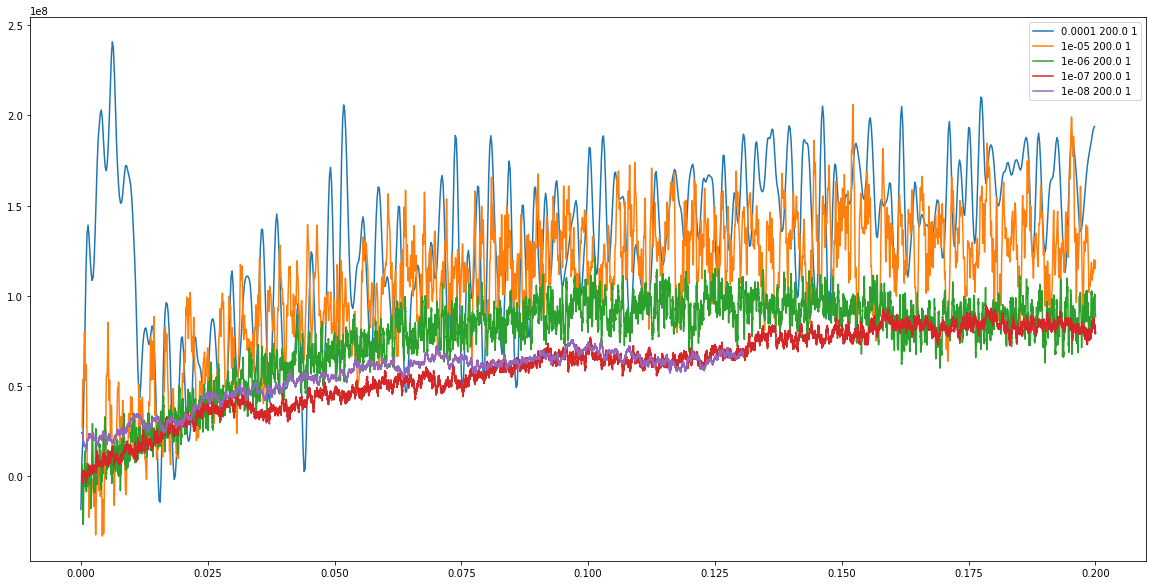

In [16]:
for erate in dtf['erate'].unique():
    for temp in dtf['temperature'].unique():
        for repl in dtf['replica'].unique():
            if(erate<1e-3 and temp==200.0 and repl<2):
                print(repl, erate, temp)
                edtf=dtf[dtf['erate']==erate]
                tedtf=edtf[edtf['temperature']==temp]
                rtedtf=tedtf[tedtf['replica']==repl]
                slab=str(erate)+' '+str(temp)+' '+str(repl)
                plt.plot(rtedtf['eyy'][0:],-101325*rtedtf['ra_pyy'][0:], label=slab)
plt.legend()
plt.show()

In [ ]:
mdtf=dtf.groupby(['erate','temperature','step']).mean()
mdtf.reset_index(['erate','temperature','step'],inplace=True)

In [ ]:
# expdf=pd.read_csv(biloc+'/tmp/prediction_pnc/Figures/data_PE/PE_CNT_uniaxial2.csv',names=['eyy','pyy'], skiprows=1)

In [ ]:
for erate in mdtf['erate'].unique():
    for temp in mdtf['temperature'].unique():
        print(erate,temp)
        emdtf=mdtf[mdtf['erate']==erate]
        temdtf=emdtf[emdtf['temperature']==temp]
        slab='rate '+str(erate)+'fs-1,'+' temp '+str(temp)+'K'
        plt.plot(temdtf['eyy'][0:],-101325*temdtf['ra_pyy'][0:], label=slab)
        
# plt.plot(expdf['eyy'],expdf['pyy'], label='exp:HDPE_KT10000_MFI8_d0.964, temp:room, rate:0.008s-1')
plt.legend()
plt.show()

In [ ]:
plt.axis([0.0,0.30,-2000.,2000.])
thingy="fvol_sr0.000001"
plt.plot(dtf[dtf['config']==thingy]['eyy'], 
         dtf[dtf['config']==thingy]['ra_pyy'], label=thingy)
thingy="fvol_sr0.00001"
plt.plot(dtf[dtf['config']==thingy]['eyy'], 
         dtf[dtf['config']==thingy]['ra_pyy'], label=thingy)
thingy="fvol_sr0.0001"
plt.plot(dtf[dtf['config']==thingy]['eyy'], 
         dtf[dtf['config']==thingy]['ra_pyy'], label=thingy)
# plt.legend()
plt.show()

Observations:
- At very high strains the flucutations of the stresses tend to increase slightly
- The slower the loading the softer the behaviour in tension
- Apparent convergence of the behaviour after $n_{ts}>10^6$ namely $e_{rate} < 10^{-7}$

## DeaLAMMPS Local Stress vs Strain Curve

In [2]:
# Denomination of data folder
# iloc='../muc_3pbt_medium/'
# iloc='/home/maxime/muc_work/local_projects/DeaLAMMPS/build_sm3pbt/'

# iloc='/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/'
# iloc='/home/maxime/local_projects/DeaLAMMPS/build_uniax/'
# floc='nanoscale_state/out/spec/meta.2.dat'
# floc='meta.0.dat'

biloc='/home/maxime'
# biloc='/Users/vassaux/picasso_home'
eiloc='/muc_scratch/local_projects/DeaLAMMPS/'
# eiloc='/local_projects/DeaLAMMPS/'
tiloc='build_uniax/'

iloc=biloc+eiloc+tiloc

# iloc='/home/maxime/muc_work/local_projects/DeaLAMMPS/build_uniax/unconstrained/'
floc='nano_spec/meta.0.dat'
# floc='nanoscale_state/out/spec/meta.0.dat'
# floc='nanoscale_state/out/spec/meta.2281.dat' # bottom face (2336, 2281)
# floc='nano_spec/meta.18175.dat' # top face

In [3]:
latmp=os.listdir(iloc)
latmp

['ll.haswell.micro',
 'macroscale_log',
 'bak.dealammps.cc',
 'hmm_sr0.00001',
 'Makefile',
 'hmm_sr0.00001_elastic',
 'macroscale_state',
 'cmake_install.cmake',
 'tmp.tsfr',
 'nanoscale_state',
 'hmm_sr0.0001',
 'CMakeCache.txt',
 'll.thin.test',
 'dealammps',
 'hmm_sr0.000001',
 'hmm_sr0.00001_monodisp',
 'output.job2054545',
 'CMakeFiles',
 'implementation_testing',
 'error.job2054545',
 'll.thin.general',
 'nanoscale_log',
 'nohup.out',
 'hmm_sr0.0000001',
 'log.dealammps']

In [4]:
lattmpt=[]
for thing in latmp:
    if ("hmm" in thing):
        print(thing[6:])
        lattmpt.append(thing)
        
# lattmpt.append("")
lattmpt.sort()
lattmpt

0.00001
0.00001_elastic
0.0001
0.000001
0.00001_monodisp
0.0000001


['hmm_sr0.0000001',
 'hmm_sr0.000001',
 'hmm_sr0.00001',
 'hmm_sr0.00001_elastic',
 'hmm_sr0.00001_monodisp',
 'hmm_sr0.0001']

In [5]:
dtf=pd.DataFrame()
fpdisp = 0.0
for thing in lattmpt:
    tloc=iloc+thing+"/"+floc
    print(tloc)
    if(os.path.isfile(tloc)):
        print(tloc)
        erate=thing[6:]
        df=pd.read_csv(tloc)
        namcol=df.columns
        print(namcol)
        df.reset_index(inplace=True)
        df.insert(1, 'erate', erate)
        #df=pd.read_csv(tloc, names=None)
        #df['imposed_displacement'] += fpdisp
        #fpdisp=df['imposed_displacement'][-1:].values
        #     df['imposed_displacement'] *= -1.0
        dtf=dtf.append(df)
        #print(df)

/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/hmm_sr0.0000001/nano_spec/meta.0.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/hmm_sr0.0000001/nano_spec/meta.0.dat
Index(['timest_no', 'cell', 'loc_x', 'loc_y', 'loc_z', 'strain_xx',
       'strain_yy', 'strain_zz', 'strain_xy', 'strain_xz', 'strain_yz',
       'stress_xx', 'stress_yy', 'stress_zz', 'stress_xy', 'stress_xz',
       'stress_yz', 'stif_xxxx', 'stif_yyyy', 'stif_zzzz'],
      dtype='object')
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/hmm_sr0.000001/nano_spec/meta.0.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/hmm_sr0.000001/nano_spec/meta.0.dat
Index(['timest_no', 'cell', 'loc_x', 'loc_y', 'loc_z', 'strain_xx',
       'strain_yy', 'strain_zz', 'strain_xy', 'strain_xz', 'strain_yz',
       'stress_xx', 'stress_yy', 'stress_zz', 'stress_xy', 'stress_xz',
       'stress_yz', 'stif_xxxx', 'stif_yyyy', 'stif_zzzz'],
      dtype='object')
/home/maxime/muc_s

In [6]:
dtf

,index,erate,timest_no,cell,loc_x,loc_y,loc_z,strain_xx,strain_yy,strain_zz,...,strain_yz,stress_xx,stress_yy,stress_zz,stress_xy,stress_xz,stress_yz,stif_xxxx,stif_yyyy,stif_zzzz
0,0,0.0000001,1,0,0,0,0,-0.000385,0.001,-0.000310,...,-0.000001,-1.746230e-10,1975320.0,5.820770e-11,-97293.9,-44735.10,-48581.0,4.219150e+09,3.445670e+09,3.130530e+09
1,1,0.0000001,2,0,0,0,0,-0.000770,0.002,-0.000621,...,-0.000003,4.656610e-10,3950640.0,3.201420e-10,-194588.0,-89470.10,-97161.9,4.219150e+09,3.445670e+09,3.130530e+09
2,2,0.0000001,3,0,0,0,0,-0.001155,0.003,-0.000931,...,-0.000004,3.492460e-10,5925960.0,2.328310e-10,-291882.0,-134205.00,-145743.0,4.219150e+09,3.445670e+09,3.130530e+09
3,3,0.0000001,4,0,0,0,0,-0.001540,0.004,-0.001242,...,-0.000005,-5.238690e-10,7901280.0,-4.947650e-10,-389176.0,-178940.00,-194324.0,4.219150e+09,3.445670e+09,3.130530e+09
4,4,0.0000001,5,0,0,0,0,-0.001926,0.005,-0.001552,...,-0.000006,-5.820770e-10,9876600.0,-5.529730e-10,-486470.0,-223675.00,-242905.0,4.219150e+09,3.445670e+09,3.130530e+09
5,5,0.0000001,6,0,0,0,0,-0.021684,0.006,0.004039,...,-0.025899,6.984920e-10,7841170.0,-3.492460e-10,1371080.0,788830.00,698163.0,3.850060e+09,4.595030e+09,4.276370e+09
6,6,0.0000001,7,0,0,0,0,-0.022582,0.007,0.004000,...,-0.025886,-4.074540e-10,9387200.0,-5.238690e-10,1797830.0,748939.00,960705.0,3.850060e+09,4.595030e+09,4.276370e+09
7,7,0.0000001,8,0,0,0,0,-0.023481,0.008,0.003961,...,-0.025874,0.000000e+00,10933200.0,-2.328310e-10,2224590.0,709049.00,1223250.0,3.850060e+09,4.595030e+09,4.276370e+09
8,8,0.0000001,9,0,0,0,0,-0.024380,0.009,0.003922,...,-0.025862,-6.984920e-10,12479200.0,-2.910380e-10,2651350.0,669159.00,1485790.0,3.850060e+09,4.595030e+09,4.276370e+09
9,9,0.0000001,10,0,0,0,0,-0.025279,0.010,0.003883,...,-0.025849,1.979060e-09,14025300.0,1.979060e-09,3078100.0,629268.00,1748330.0,3.850060e+09,4.595030e+09,4.276370e+09


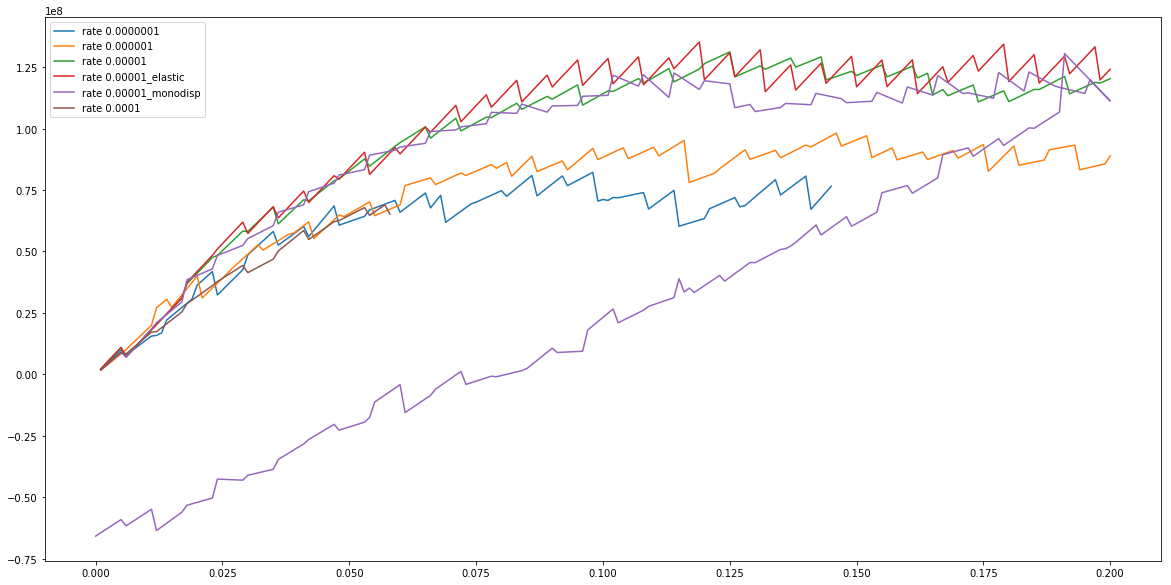

In [7]:
for erate in dtf['erate'].unique():
    tdtf=dtf[dtf['erate']==erate]
    plt.plot(tdtf['strain_yy'], 
             tdtf['stress_yy'], label='rate '+str(erate))
plt.legend()
plt.show()

## DeaLAMMPS Local Stress vs Strain Curve from MD

In [24]:

biloc='/home/maxime'
# biloc='/Users/vassaux/picasso_home'
eiloc='/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/'
# eiloc='/local_projects/DeaLAMMPS/build_uniax/'

iloc=biloc+eiloc

# iloc='/home/maxime/muc_work/local_projects/DeaLAMMPS/build_uniax/unconstrained/'
floc='PE_strain_press_evol.dat'

In [30]:
latmp=os.listdir(iloc)
latmp

['136-1.0',
 '240-1.0',
 '143-1.0',
 '284-1.0',
 '187-1.0',
 '18-1.0',
 '205-1.0',
 '212-1.0',
 '115-1.0',
 '256-1.0',
 '23-1.0',
 '263-1.0',
 '228-1.0',
 '235-1.0',
 '160-1.0',
 '93-1.0',
 '118-1.0',
 '265-3.0',
 '259-1.0',
 '176-1.0',
 '280-1.0',
 '278-3.0',
 '57-1.0',
 '118-3.0',
 '80-1.0',
 '111-1.0',
 '247-3.0',
 '71-1.0',
 '37-3.0',
 '39-1.0',
 '245-1.0',
 '148-1.0',
 '62-1.0',
 '155-1.0',
 '289-1.0',
 '20-1.0',
 '77-1.0',
 '11-1.0',
 '217-1.0',
 '68-1.0',
 '35-1.0',
 '127-1.0',
 '231-1.0',
 '146-3.0',
 '59-1.0',
 '26-1.0',
 '268-1.0',
 '15-3.0',
 '275-1.0',
 '300-1.0',
 '106-1.0',
 '120-1.0',
 '247-1.0',
 '299-1.0',
 '13-1.0',
 '5-1.0',
 '278-1.0',
 '285-1.0',
 '292-1.0',
 '195-1.0',
 '83-1.0',
 '206-1.0',
 '109-1.0',
 '74-1.0',
 '220-1.0',
 '130-1.0',
 '8-1.0',
 '65-1.0',
 '167-1.0',
 '271-1.0',
 '274-3.0',
 '174-1.0',
 '181-1.0',
 '263-3.0',
 '139-1.0',
 '243-1.0',
 '146-1.0',
 '250-1.0',
 '29-1.0',
 '198-1.0',
 '52-1.0',
 '294-1.0',
 '215-1.0',
 '34-1.0',
 '184-1.0',
 '49-1.0

In [31]:
lattmpt=[]
for thing in latmp:
    if (int(thing[:-4])<401):
        lattmpt.append(thing[:-4])
        
# lattmpt.append("")
lattmpt.sort(key=int)
lattmpt

['3',
 '5',
 '5',
 '8',
 '11',
 '13',
 '15',
 '15',
 '18',
 '20',
 '23',
 '26',
 '29',
 '31',
 '34',
 '35',
 '37',
 '37',
 '39',
 '42',
 '45',
 '46',
 '49',
 '52',
 '55',
 '57',
 '59',
 '59',
 '62',
 '62',
 '65',
 '68',
 '71',
 '74',
 '77',
 '80',
 '83',
 '86',
 '87',
 '90',
 '93',
 '95',
 '97',
 '100',
 '103',
 '106',
 '109',
 '111',
 '111',
 '112',
 '115',
 '118',
 '118',
 '120',
 '121',
 '124',
 '127',
 '130',
 '131',
 '133',
 '136',
 '139',
 '139',
 '142',
 '143',
 '146',
 '146',
 '148',
 '148',
 '155',
 '157',
 '160',
 '161',
 '164',
 '167',
 '167',
 '170',
 '173',
 '174',
 '176',
 '179',
 '181',
 '181',
 '184',
 '187',
 '189',
 '192',
 '195',
 '198',
 '198',
 '201',
 '202',
 '205',
 '206',
 '209',
 '212',
 '215',
 '217',
 '220',
 '223',
 '226',
 '226',
 '228',
 '231',
 '232',
 '235',
 '237',
 '240',
 '243',
 '243',
 '244',
 '244',
 '245',
 '247',
 '247',
 '250',
 '253',
 '256',
 '259',
 '260',
 '262',
 '263',
 '263',
 '265',
 '265',
 '268',
 '271',
 '271',
 '274',
 '274',
 '275',

In [32]:
dtf=pd.DataFrame()
len0=68.805343
for thing in lattmpt:
    tloc=iloc+thing+"-1.0/"+floc
    if(os.path.isfile(tloc)):
        print(tloc)
        ncolumns=['step', 'press', 'pxx', 'pyy', 'pzz', 'pe', 'ke', 'temp', 'lx', 'ly', 'lz', 'vol']
        df=pd.read_csv(tloc, sep=' ', names=ncolumns, skiprows=1)
        df.reset_index(inplace=True)
        df.insert(1, 'config', thing)
        df['exx']=(df['lx']-len0)/len0
        df['eyy']=(df['ly']-len0)/len0
        df['ezz']=(df['lz']-len0)/len0
        df['ra_pxx']=df['pxx'].rolling(window=10).mean()
        df['ra_pyy']=df['pyy'].rolling(window=10).mean()
        dtf=dtf.append(df)
        #print(df)

/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/3-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/5-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/5-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/8-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/11-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/13-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002

/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/121-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/124-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/127-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/130-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/131-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/133-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.000

/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/243-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/243-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/244-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/244-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/245-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.00001_sp0.002_sr0.00001/nanoscale_log/R1/247-1.0/PE_strain_press_evol.dat
/home/maxime/muc_scratch/local_projects/DeaLAMMPS/build_uniax/56.ELASTICT_hsr0.000

In [33]:
dtf#[dtf["config"]=="1"]

,index,config,step,press,pxx,pyy,pzz,pe,ke,temp,lx,ly,lz,vol,exx,eyy,ezz,ra_pxx,ra_pyy
0,0,3,340001,78.165572,-106.576200,181.225320,159.847596,14378.572831,15377.015446,200.328920,68.805343,68.805343,68.805343,325736.555377,5.295605e-09,5.295605e-09,5.295605e-09,NaN,NaN
1,1,3,340002,53.255610,-180.639770,248.413329,91.993270,14362.291578,15392.386527,200.529172,68.805086,68.806108,68.804926,325736.978917,-3.736020e-06,1.111641e-05,-6.064160e-06,NaN,NaN
2,2,3,340003,11.603082,-253.438553,251.705578,36.542222,14440.758277,15319.964474,199.585671,68.804829,68.806872,68.804508,325737.402401,-7.477336e-06,2.222752e-05,-1.213362e-05,NaN,NaN
3,3,3,340004,-44.266292,-303.371548,145.351349,25.221323,14524.182792,15242.707739,198.579184,68.804571,68.807637,68.804091,325737.825829,-1.121865e-05,3.333863e-05,-1.820307e-05,NaN,NaN
4,4,3,340005,-113.668428,-314.008081,-70.614449,43.617248,14523.222213,15243.180021,198.585337,68.804314,68.808401,68.803673,325738.249200,-1.495997e-05,4.444974e-05,-2.427253e-05,NaN,NaN
5,5,3,340006,-195.465246,-308.873686,-327.375316,49.853263,14447.238833,15313.452575,199.500835,68.804056,68.809166,68.803255,325738.672516,-1.870128e-05,5.556086e-05,-3.034198e-05,NaN,NaN
6,6,3,340007,-282.908630,-334.197072,-523.719974,9.191155,14387.021235,15369.691293,200.233502,68.803799,68.809930,68.802838,325739.095775,-2.244260e-05,6.667197e-05,-3.641144e-05,NaN,NaN
7,7,3,340008,-364.862000,-406.675643,-605.696161,-82.214197,14409.138980,15349.513125,199.970625,68.803541,68.810695,68.802420,325739.518978,-2.618392e-05,7.778308e-05,-4.248090e-05,NaN,NaN
8,8,3,340009,-431.558590,-501.163881,-589.471511,-204.040377,14488.036168,15276.282262,199.016587,68.803284,68.811459,68.802002,325739.942124,-2.992523e-05,8.889419e-05,-4.855035e-05,NaN,NaN
9,9,3,340010,-475.651578,-579.926895,-523.719556,-323.308284,14541.984329,15225.977589,198.361227,68.803027,68.812224,68.801585,325740.365215,-3.366655e-05,1.000053e-04,-5.461981e-05,-328.887133,-181.390139


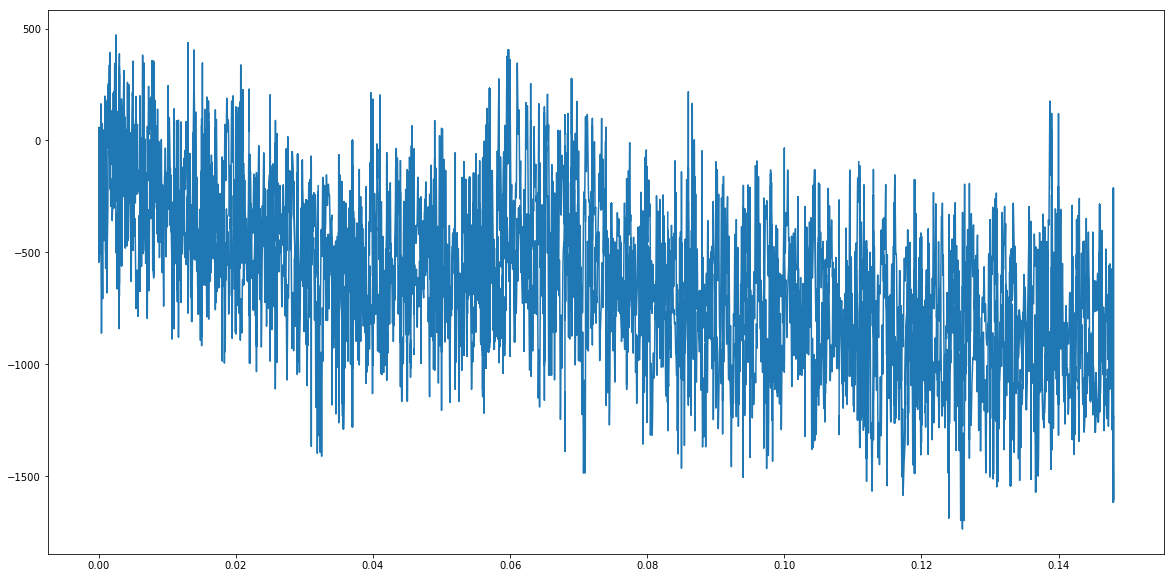

In [34]:
# plt.axis([0.0,0.30,-2000.,2000.])
# thingy="fvol_sr0.000001"
# plt.plot(dtf[dtf['config']==thingy]['eyy'], 
#          dtf[dtf['config']==thingy]['ra_pxx'], label=thingy)
plt.plot(dtf['eyy'], 
         dtf['ra_pyy'])
# plt.legend()
plt.show()

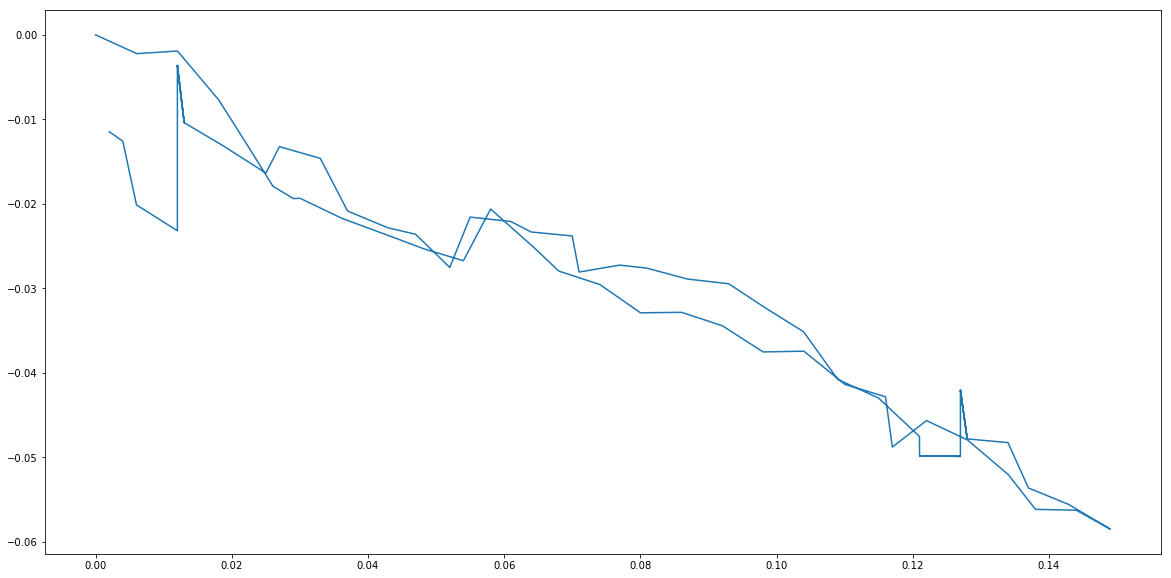

In [17]:
plt.plot(dtf['eyy'], 
         dtf['exx'], label=thingy)
# plt.legend()
plt.show()

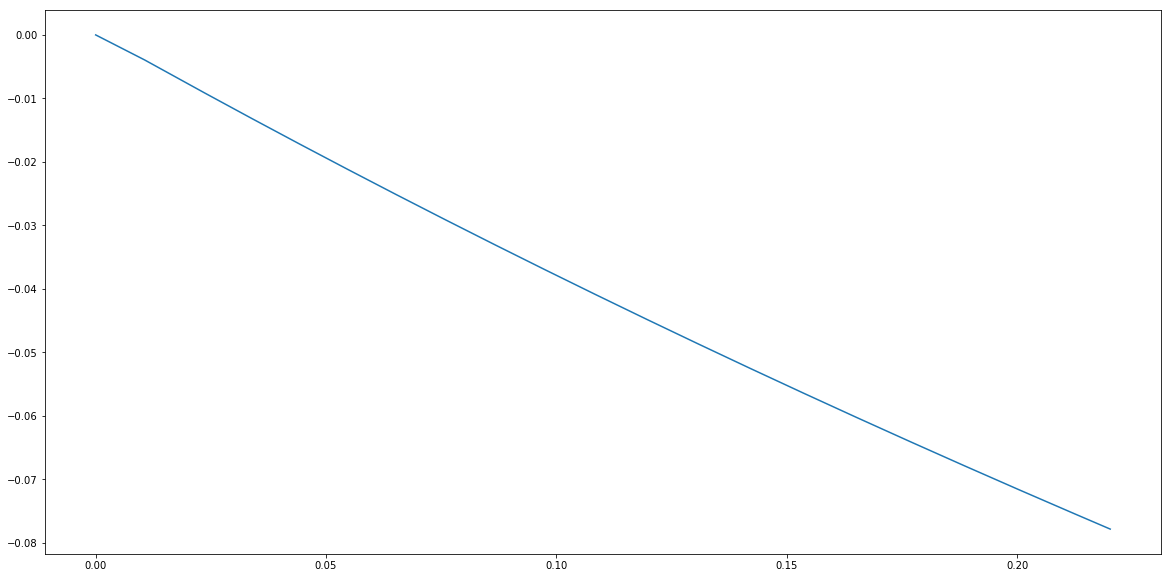

In [69]:
plt.plot(dtf['eyy'], 
         dtf['exx'], label=thingy)
# plt.legend()
plt.show()

## Discussion

### Multi-scale modeling

#### At a given scale

Relaxation time (time-scale): time to see return to equilibrium of a perturbed system (e.g no more depedendance on strain rate).

Characteristic length (length-scale): size of a sample sufficient enough to consider it as a RVE, e.g can be considered periodic in space.

To assume that what happens above a certain time and a certain volume will not influence the bahvior at a given scale, a few relaxation time and characteristic length must be modeled in a given scale model.

#### Hypothesis to limit computation at nanoscale

Reduce relaxation time:
- In a general sense, avoid flow which occurs on longer time ranges.
- Remain below $T_g$ to reduce relaxation time (?) because mobility better above $T_g$, therefore lower energy state can be found, but takes longer (flow regime).
- Higher density for lower free volume (?), therefore reduced mobility and reduced relaxation time.
- The reptation characteristic time increases rapidly with molecular weight: $\tau_{rep} = M_w^{3.4}$

Reduce characteristic length:
- Use shorter chain length to reduce relaxation time and characteristic length, can be justified by:
    - argue that characteristic length is the entanglement length
    - fake the presence of infinitely long polymer chains?
    - use cross-linked polymers as it reduces the characteristic length at the nanoscale
    
#### What is the time scale at the mesoscale?

Do we have to model the dynamic equilibrium at the mesoscale?

It could be interesting to have a **dynamic** equilibrium at the mesoscale to be able to justify that we don't look at diffusion mechanisms (~millisecond). Thus we would simulate strain rates slower than at the nanoscale, but faster than the time-scales requiring **diffusion**. Actually, for epoxy these timescales might be so long due to crosslinking that it might not be necessary to go fast. But then, thanks to dynamicity, we could capture **wave** propagation effects induced by the moderately high strain rates.

To actually, capture this mechanisms associated with visco-elasticity/plasticy, we would have to introduce a microscale and use **coarse-grained** MD to observe the structures that are concerned by diffusion (polymer chains, ~micrometer), on sufficiently long time-scales (~millisecond).



### Chemical specificity and macroscopic fidelity

#### How to characterize a polymer?

Reproduce:
- polymer chain length (chem.)
- interaction potential (chem.)
- testing temperature (macro.)
- testing strain rate (macro.)
- fabrication/processing conditions (macro.) > can we simplify that by assuming identical density and MFI after equilibration?

#### What does it imply?

These aspects are of high importance in order to produce a **validation** of a **predictive** model. 

In order to predict properties of a given polymer, close discussion with experimentalist must happen, to ensure chemical specificity and high-fidelity of macroscopic conditions. However, the polymer must be chosen wisely so that it allows to verify upscaling hypothesis (periodicity and relaxation). 

In that sense **epoxy** could be a good fit as it is highly cross-linked, and does not seem to show a very characteristic mesoscale, therefore upscaling can go directly up to the macroscale. The glass transition temperature $T_g$ of epoxy is also quite high, so we can avoid long relaxation time associated with flow.

**Low molecular weight polyethylene** could also be a good fit, but it presents a meso-scale partly **semicrystalline** structure and **experimental results** might be hard to find.

As far as the study focuses on **physics**, if the chemical description of the polymer used and macroscopical conditions are identical throughout the study do not change, then a meaningful analyse can be produce. Assuming of course that the conclusions would still hold, if we were to analyse more realistic (often non-simulable because expensive) chemical descriptions and macroscopic conditions.

#### Description of James' PE

Box content: 18 PE molecules, each made of 37 monomers units $(C_2H_4)_{37}$ ($MW=1040$g)
 => Short length PE
 
Box dimensions: $8$nm before equilbration, $6.8$nm after => density:  before $0.6$g.cm$^{-3}$, after $0.98$g.cm$^{-3}$

Nanoscale uniaxial properties at $300$K with $\dot{\epsilon}=10^{10}$s$^{-1}$: $E=1.55$GPa, $\nu=0.41$, $\sigma_{max}=100$MPa

What about fracture toughness, and fracture strain? $\epsilon_{max}=275$

### How to make use of the meso/macroscale?

#### Polymers presenting a certain degree of crystallinity

Repartition of the lamellae and spherulite (semi-crystalline regions) inside the amorphous polymer. That applies for polymer such as PE, but can they also be crosslinked (or at least have short entanglement length) in the amorphous phase?

#### Embedding nanometer-thick and and micrometer-long graphene flakes

Repartition of graphene reinforced polymer boxes inside amorphous crosslinked pure polymer boxes.

#### Reproduction of real industrial (macroscopic) testing conditions

Simply homogeneous macroscale but with real micrometer and above testing structures.

### Failure

#### What explains the stress drop after the peak? How prevent it?

The peak in the simulation seem to be induced by high strain rates, as shows the stress-strain behavior using $0.00001$fs$^{-1}$ and $0.000002$fs$^{-1}$. Does the behavior converges with slower strain rates?

Experimentally stress drops are also observed, but on the contrary they are rather explained by the presence of crystaline regions at the meso-scale.

#### Is PE stronger? Why is MD simulation not entirely realistic?

Pure PE of $0.964$g.cm$^{-3}$ density, tensile test with dogbone shape ($100/50$x$10$x$2$mm$^{3}$), $E=1.095$GPa, $\sigma_{max}=105.80$, $\epsilon_{max}=863.4$, $J=634.53$J 

Explanation: short fibres? strain rate? boundary conditions?

The strength is pretty accurate, however the plateau doesn't stabilize at as low values as experiment ($90$MPa vs. $60$MPa).

The strain at failure is also smaller than experiment, but failure is actually not observed, more like the system becomes unstable for various reasons (potential not designed to reproduce breaking bonds). 

Additionally, the simulation do not reproduce a dogbone, should we use the HMM to reproduce a dogbone tensile test? https://compass.astm.org/EDIT/html_annot.cgi?D638+14

#### What happens with 3PBT of PE? D2344/D790

#### Mechanisms

Hardening has to do with the alignment of the fibres, and them being fully tensed, instead of being curved.

On the other side, the softening has to do with:
- sliding of fibres (not even sure, because if friction is involved this should be at constant force, instead of decreasing force),
- disentanglmement,
- failure of bonds (we do not model failure, but isn't there a reduction of the force between atoms in the current potential?)

Additional remark, the frictional sliding could be responsible of softening in that sense: when the polymers slide past each other, their contact area varies, and can therefore decrease. This implies that even if the 'surface tangential force' is constant, the 'total frictional force' transmitted reduces, leading to softening.

In the literature, people talk about:
- cavitation

#### Radius of gyration

The end-to-end distance and orientation of polymer chains during the test (plot vs stress for example), would give interesting insights.

The radius of gyration (moment of inertia) for each molecule can give a similar insight: the radius of gyration of all the polymer molecules is piecewise linear with the strain, in average over the sample and over five replicas of the sample.

#### Further investigation

###### Interesting indicators

What outputs should we study at the MD scale:
 - energies: bending? interaction energy (with particles, in between polymer chains)?
 - porosity, cavities formation?
 - other relevant indicators?

### Output

In [40]:
mddf=mdtf.copy()

In [44]:
fedf=dtf.copy()

In [185]:
expdf=pd.read_csv(biloc+'/tmp/prediction_pnc/Figures/data_PE/PE_CNT_uniaxial3.csv',names=['eyy','pyy'], skiprows=1)

0.0001 300.0


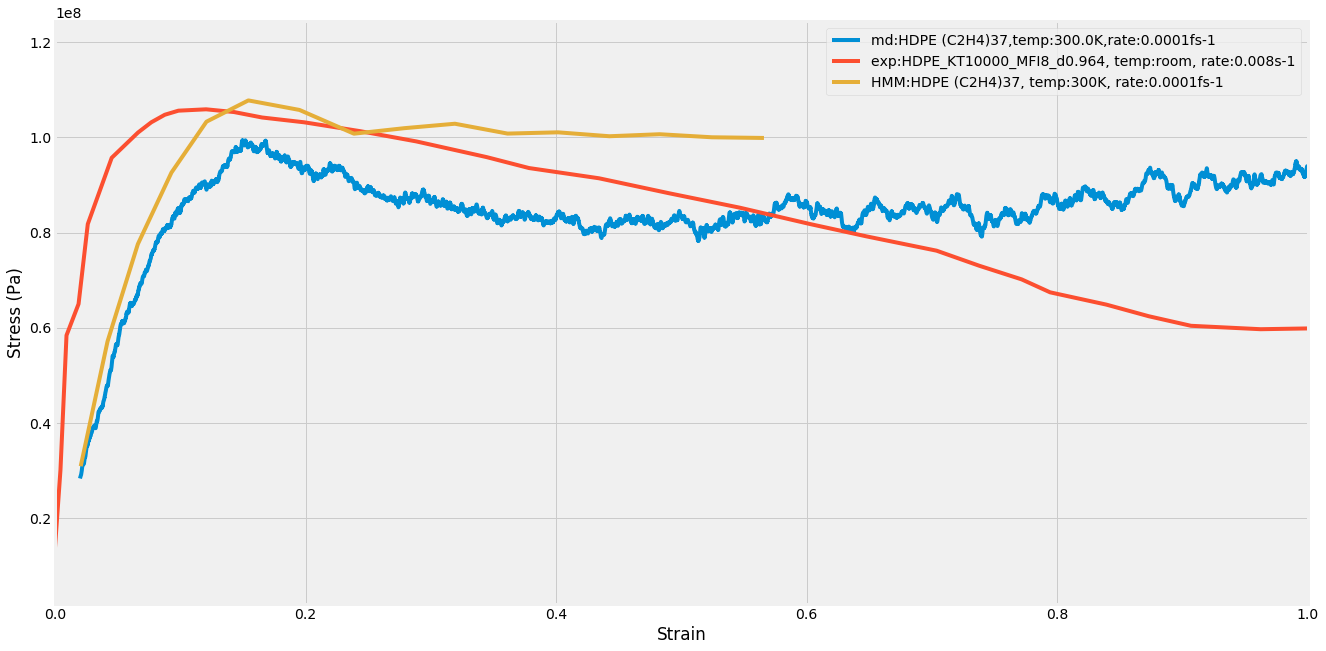

In [186]:
plt.figure(facecolor='w')
plt.style.use('fivethirtyeight')

for erate in mddf['erate'].unique():
    if erate==0.0001:
        for temp in mddf['temperature'].unique():
            print(erate,temp)
            emdtf=mddf[mddf['erate']==erate]
            temdtf=emdtf[emdtf['temperature']==temp]
            slab='md:HDPE (C2H4)37,'+'temp:'+str(temp)+'K,'+'rate:'+str(erate)+'fs-1' #_d0.977
            plt.plot(temdtf['eyy'][0:],-101325*temdtf['ra_pyy'][0:], label=slab)
        
plt.plot(expdf['eyy'],expdf['pyy'], label='exp:HDPE_KT10000_MFI8_d0.964, temp:room, rate:0.008s-1')
plt.plot(dstdf['eyy'],dstdf['pyy'], label='HMM:HDPE (C2H4)37, temp:300K, rate:0.0001fs-1') #_d0.977

axes = plt.gca()
axes.set_xlim([0.,1.0])
plt.xlabel('Strain')
plt.ylabel('Stress (Pa)')
plt.legend()
# plt.show()
# plt.savefig('/home/maxime/Desktop/tmp.pdf', format='pdf')
plt.savefig('/home/maxime/Desktop/tmp.png', facecolor='w', transparent=False)